## Part 3 Loading Data & EDA

Import relevant packages for the following parts

In [1]:
import numpy as np
import pandas as pd
import math
import re
import sys

from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from preprocessing import get_processed_data
import csv

### Import data cleaned by using the selfwritten preprocessing module

In [2]:
moria_df=get_processed_data('moria-data')


loading files...
C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data/
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 1.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 10.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 2.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 3.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business Scho

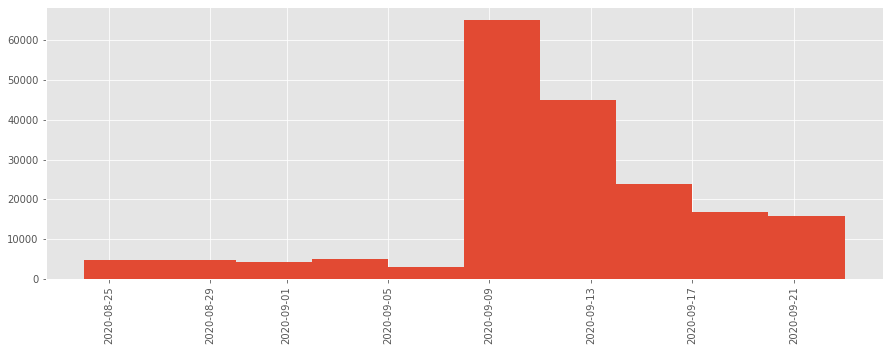

In [36]:
moria_df.reset_index(drop=True, inplace=True)
#type(contents)
moria_df['Date Short'] = pd.to_datetime(moria_df['Date Short'])
moria_df = moria_df.set_index(moria_df['Date Short'])
moria_df = moria_df.sort_index()

moria_df.head()
#moria_df['Date Short'].sort_values()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

moria_df['Date Short'].hist()

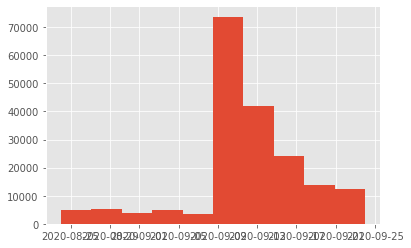

In [18]:
moria_df['Date'].hist()

In [156]:
event_date = '2020-09-08'


# create train test partition
pre_event = moria_df[:event_date]
post_event  = moria_df[event_date:]


#pre_event = moria_df.loc(moria_df['Date Short'] < event_date)
#post_event = moria_df.loc(moria_df['Date Short']>= event_date)

print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)


Train Dataset: (23214, 32)
Test Dataset: (165514, 32)


In [157]:
pre_event.head(20)

,Date,URL,Tweet Raw,Influencer,Country,Language,Reach,Engagement,AVE,Sentiment,...,Time,State,City,Hashtags,Mentions,Linked Content,Retweet,Quote Tweet,Tweet Clean,Tweet Clean Tokens
Date Short,,,,,,,,,,,,,,,,,,,,,
2020-08-24,2020-08-24 23:02:00,https://twitter.com/Ali_Gabhann/statuses/12980...,RT @medbnidhulain: Last year my mother helped ...,@ali_gabhann,Unknown,English,73,NaN,0.68,Positive,...,11:02 PM,NaN,NaN,[],[medbnidhulain],[],True,False,rt last year my mother helped to place a syr...,"[last, year, mother, helped, place, syrian, fa..."
2020-08-24,2020-08-24 20:52:00,https://twitter.com/NiallDQuinn/statuses/12979...,QT @medbnidhulain: THIS 👏🏼 ; Last year my moth...,@nialldquinn,Unknown,English,139,NaN,1.29,Neutral,...,8:52 PM,NaN,NaN,[],[medbnidhulain],[],False,True,qt this last year my mother helped to p...,"[last, year, mother, helped, place, syrian, fa..."
2020-08-24,2020-08-24 20:50:00,https://twitter.com/GreeceOutsideIn/statuses/1...,Hundreds rescued in the Mediterranean as migra...,@greeceoutsidein,Greece,English,1961,NaN,18.14,Neutral,...,8:50 PM,Attica,Athens,"[Greece, news]",[],[https://t.co/p4npeJLA52],False,False,hundreds rescued in the mediterranean as migra...,"[hundred, rescued, mediterranean, migration, b..."
2020-08-24,2020-08-24 20:50:00,https://twitter.com/lesyeuxdeyves/statuses/129...,RT @unpredie: Why doesn't anyone blame Europea...,@lesyeuxdeyves,Yemen,English,198,NaN,1.83,Negative,...,8:50 PM,Sanaa,Sanaa,[],[unpredie],[],True,False,rt why doesn t anyone blame european countri...,"[anyone, blame, european, country, allowing, r..."
2020-08-24,2020-08-24 20:47:00,https://twitter.com/rans_salim/statuses/129796...,RT @g8kcen: Since some people don’t believe th...,@rans_salim,United Kingdom,English,214,NaN,1.98,Neutral,...,8:47 PM,England,London,[],[g8kcen],[https://t.co/zwdK2mIAs6],True,False,rt since some people don t believe that gree...,"[since, people, believe, greece, deflating, im..."
2020-08-24,2020-08-24 20:45:00,https://twitter.com/geof_johns/statuses/129796...,RT @Rob_Kimbell: You pass through one or more ...,@geof_johns,Unknown,English,305,NaN,2.82,Neutral,...,8:45 PM,NaN,NaN,[],[Rob_Kimbell],[https://t.co/E3xt6awDhG],True,False,rt you pass through one or more of these cou...,"[country, claim, asylum, earth, claim, refugee..."
2020-08-24,2020-08-24 20:42:00,https://twitter.com/ANGIE_nyc/statuses/1297967...,QT @__M_B_Z__: RT @Makedni: Turkish boat forci...,@angie_nyc,Unknown,English,524,NaN,4.85,Neutral,...,8:42 PM,NaN,NaN,[اردوغان],"[__M_B_Z__, Makedni, kmitsotakis, neademokrati...",[https://t.co/b3akzUUdbO],True,True,qt rt turkish boat forcing migrants to go ...,"[turkish, boat, forcing, migrant, greece, kmit..."
2020-08-24,2020-08-24 20:42:00,https://twitter.com/vantetrivias/statuses/1297...,RT @kijisuya: the greece government is abandon...,@vantetrivias,Sri Lanka,English,2996,NaN,27.71,Neutral,...,8:42 PM,Uva,Badulla,[],[kijisuya],[],True,False,rt the greece government is abandoning immig...,"[greece, government, abandoning, immigrant, pe..."
2020-08-24,2020-08-24 20:41:00,https://twitter.com/Charthem/statuses/12979674...,RT @mirjamjanssen: Migration in Greece 👇 a vid...,@charthem,Unknown,English,409,NaN,3.78,Neutral,...,8:41 PM,NaN,NaN,[],"[mirjamjanssen, thedukeoriginal]",[https://t.co/VRHqJO11v6],True,False,rt migration in greece a video from thedu...,"[migration, greece, video, thedukeoriginal]"


Also delete duplicate tweets. 

In [155]:
#maybe we should keep the one with highest Reach? or other metric?
moria_df.drop_duplicates(subset ="Tweet Raw", inplace = True) 


---

### EDA

what features can we do:
length of tweet (words, characters) (int)
length of cleaned tweet (words) (int)
hashtags used (list)
no. of hashtags (int)


In [6]:
moria_df.reset_index(drop=True, inplace=True)



In [7]:
pd.set_option('display.max_colwidth',None)
print(moria_df['Tweet Raw'].loc[[10]])
print(moria_df['Tweet Clean'].loc[[10]])

10    QT @YusufErim34: RT @HamdiRifaiJD: The “neo-Ottoman” narrative has only 1 purpose:\n\n2 smear Turkey as some sort of nihilistic, immoral horde of savages on a stampede \n\nIt’s a broad brush bigoted tool 2 discredit \n\nTurkey has succeeded where France failed &amp; protected refugees where Greece threw them into the sea ; I guess people never get tired of the neo-Ottoman narrative. It's a good seller in the West. https://t.co/FgPWjILL1R
Name: Tweet Raw, dtype: object
10    qt   rt   the  neo ottoman  narrative has only   purpose  n n  smear turkey as some sort of nihilistic  immoral horde of savages on a stampede  n nit s a broad brush bigoted tool   discredit  n nturkey has succeeded where france failed  amp  protected refugees where greece threw them into the sea   i guess people never get tired of the neo ottoman narrative  it s a good seller in the west   
Name: Tweet Clean, dtype: object


In [158]:
from wordcloud import WordCloud

def get_wordcloud(df):
    #collocations = including bigrams
    cloud = WordCloud(background_color='white',
                      collocations = False, 
                      width=1600, 
                      height=800).generate(' '.join(df['Tweet Clean']))
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis('off')
    return plt.show()





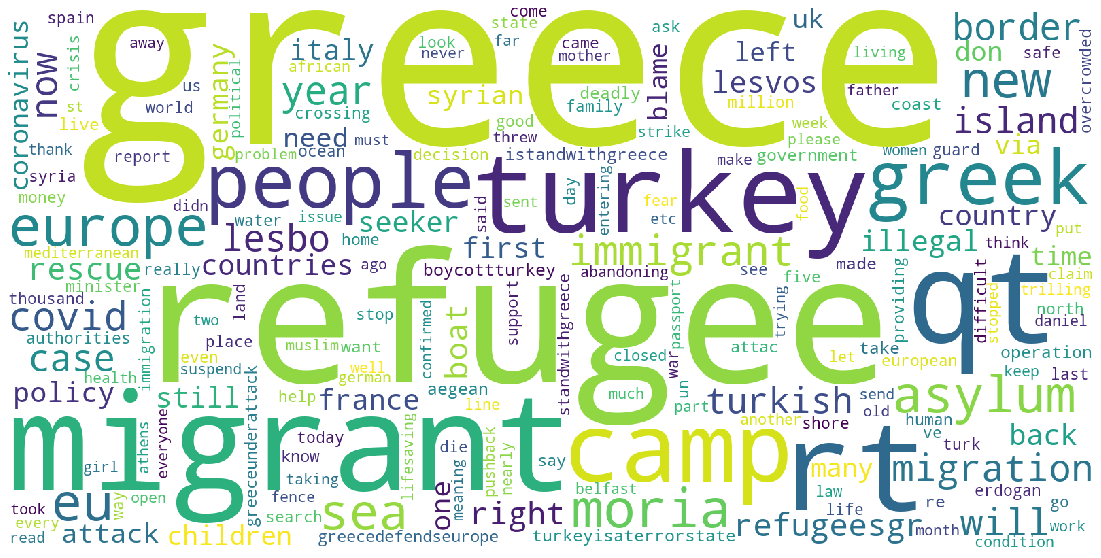

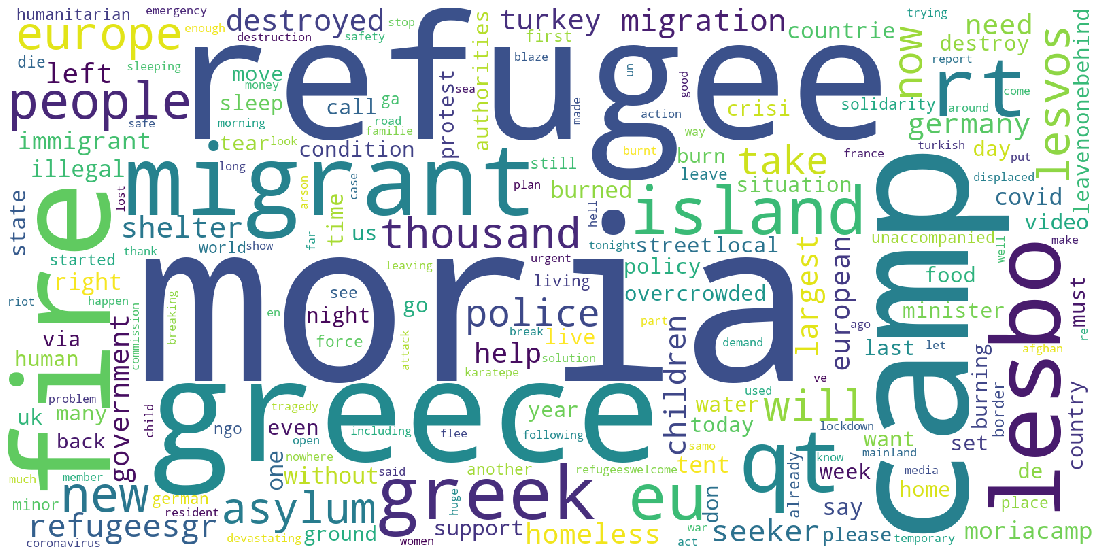

In [159]:
get_wordcloud(pre_event)

get_wordcloud(post_event)

In [160]:
import seaborn as sns

def bar_chart(dfSeries):
    plt.figure(figsize=(12,6))
    ax = dfSeries.value_counts().plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/dfSeries.shape[0]*100,2))+'%', (p.get_x()+0.2, p.get_height() * 0.5))


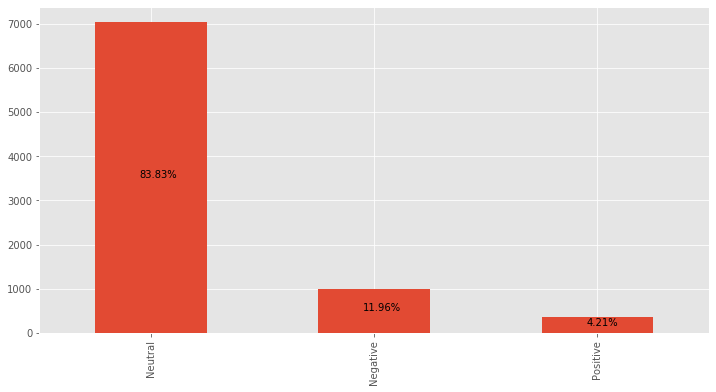

In [161]:
bar_chart(pre_event.Sentiment)

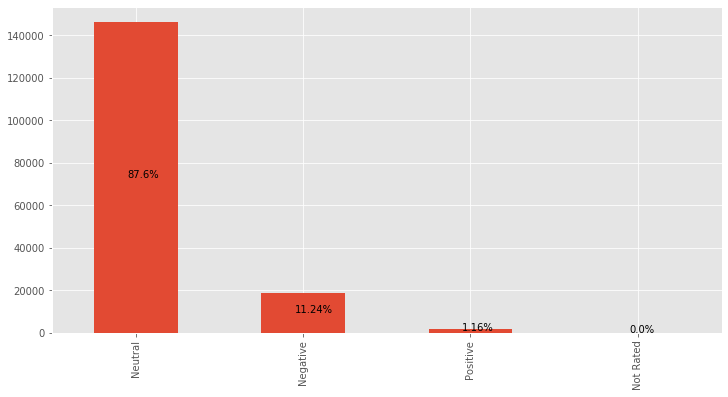

In [154]:
bar_chart(post_event.Sentiment)

In [144]:
moria_df["Country"].value_counts()

Unknown                    86027
United Kingdom             18655
United States              16865
Greece                     11941
Germany                     7958
                           ...  
Niue                           1
Saint Kitts And Nevis          1
Netherlands Antilles           1
Anguilla                       1
Virgin Islands, British        1
Name: Country, Length: 220, dtype: int64

In [10]:
moria_df['Reach'].describe()


count    2.410000e+02
mean     1.430630e+04
std      1.608952e+05
min      1.000000e+00
25%      1.390000e+02
50%      5.150000e+02
75%      1.934000e+03
max      2.491181e+06
Name: Reach, dtype: float64

In [11]:
print('Mean reach:',round(moria_df["Reach"].mean(),2))
print('Median reach:',moria_df["Reach"].median())
print('Max reach:', max(moria_df["Reach"]))

Mean reach: 14306.3
Median reach: 515.0
Max reach: 2491181


In [ ]:
def plot_hist(measure = 'Reach'):
    print("Number of Unique {}: {}".format(measure, str(len(moria_df[measure].unique()))))
    print("{} Median: {}".format(measure, str(moria_df[measure].median())))
    print(moria_df[measure].describe())
    plt.figure(figsize=(14,4))
    plt.hist(moria_df[measure], bins = 100)
    plt.show()

    
plot_hist()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14,4))
ax.hist(moria_df["Alternate Date Format"], bins=10)
ax.set_xlabel("Reach")
ax.set_ylabel("Number of apps per bin")

fig.tight_layout(pad=0.5)

https://benlevyx.github.io/twitter-polling/eda/

have a similar chart but display how the sentiment/topics (or mixture = combined chart) changes over time (instead of no. of likes)

heatmap for tweets that have several topics, or in overall the correlation of events



We could do a heatmap with words in a similar way as here:

![title](https://pytorch.org/tutorials/_images/sphx_glr_seq2seq_translation_tutorial_004.png)

found on https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html